In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
import spacy

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
#load preprocessed data
preprocessed_data = pd.read_csv('Gaza_v2_preprocessed.csv')
preprocessed_data.head()

,article_title,author,published_time,article_text
0,Death toll of Palestinians in Gaza rises to 27...,By Xinhua,"Published: Feb 06, 2024 10:19 AM",People gather around a destroyed house after a...
1,"China, Norway should be forces for stability, ...",By Global Times,"Published: Feb 06, 2024 12:35 PM",China Foreign Minister Wang Yi (right) meets w...
2,"Wang, Eide hold talks as Europe's China policy...",By Fan Anqi,"Published: Feb 06, 2024 10:57 PM",China Foreign Minister Wang Yi (right) meets w...
3,Why does the US keep creating wars while sayin...,By Global Times,"Published: Feb 04, 2024 12:41 AM","Illustration: Liu Rui/GTOn Friday local time, ..."
4,"With war next door, EU noses into Indo-Pacific",By Mark Blacklock,"Published: Feb 04, 2024 06:59 PM",Photo: VCGWestern attitudes toward Asia can so...


In [ ]:
#load top 50 words for each entity type from the NER results
ner_results = pd.read_excel('Gazav2_TopWords.xlsx')
ner_results.head()

,Entity Type,Word,Count
0,LOC,Israel,1947
1,LOC,Gaza,1682
2,LOC,US,914
3,LOC,China,904
4,LOC,Palestine,876


In [ ]:
#filtering top 10 entities for each type
top_5 = ner_results.groupby('Entity Type').head(5)
top_5.head()

,Entity Type,Word,Count
0,LOC,Israel,1947
1,LOC,Gaza,1682
2,LOC,US,914
3,LOC,China,904
4,LOC,Palestine,876


In [ ]:
#combine top 10 into single list of entities
entities = top_5['Word'].tolist()
entities

['Israel',
 'Gaza',
 'US',
 'China',
 'Palestine',
 'Palestinian-Israeli Conflict',
 'West',
 'Houthi',
 'Islamic',
 'Republican',
 'Hamas',
 'Xinhua',
 'UN',
 'Health Ministry',
 'EU',
 'Wang Yi',
 'Joe Biden',
 'Zhang Jun',
 'Zhai Jun',
 'Xi Jinping']

## Relationship with co-occurence based in same sentence using networkx

In [ ]:
#initiliazise graph
G = nx.Graph()

#add nodes for each entity
for entity in entities:
    G.add_node(entity)

In [ ]:
co_occurrence = defaultdict(int)

In [ ]:
for article in preprocessed_data['article_text']:
    #process the article with SpaCy to get sentences
    doc = nlp(article)
    sentences = [sent.text for sent in doc.sents]
    #print(sentences)

    #iterate through each sentence in the article
    for sentence in sentences:
        present_entities = [entity for entity in entities if entity in sentence]
        #print(present_entities)
        for i in range(len(present_entities)):
            for j in range(i + 1, len(present_entities)):
                co_occurrence[(present_entities[i], present_entities[j])] += 1
                #print(co_occurrence)

In [ ]:
#add edges with weights to the graph
for (entity1, entity2), weight in co_occurrence.items():
    G.add_edge(entity1, entity2, weight=weight)

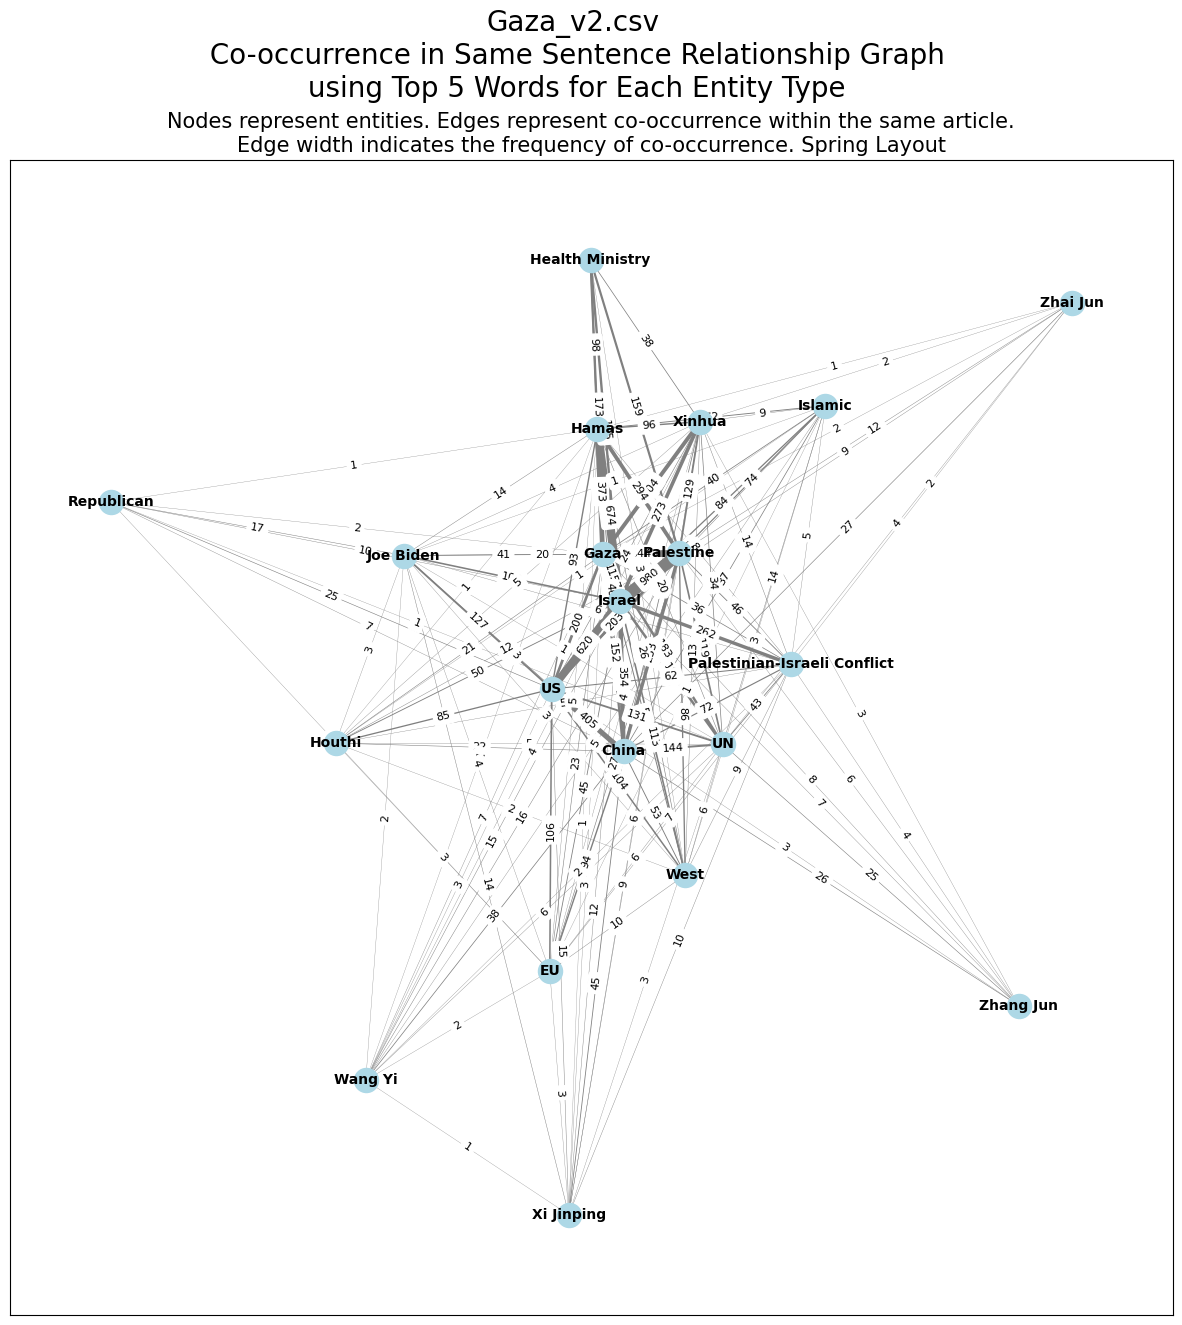

In [ ]:
#draw the graph
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G)
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]

max_weight = max(weights)
min_width = 0.2
normalized_weights = [(weight / max_weight * 10) + min_width for weight in weights]

nx.draw_networkx_nodes(G, pos, node_size=300, node_color='lightblue')
nx.draw_networkx_edges(G, pos, edgelist=edges, width=normalized_weights, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
#nx.draw(G, pos, with_labels=True, node_size=300, node_color='lightblue', edge_color='gray', font_size=10, font_weight='bold', width=weights)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8)

plt.suptitle("Gaza_v2.csv\n Co-occurrence in Same Sentence Relationship Graph\n using Top 5 Words for Each Entity Type", fontsize=20)
plt.title("Nodes represent entities. Edges represent co-occurrence within the same article.\nEdge width indicates the frequency of co-occurrence. Spring Layout", fontsize=15)
plt.show()

In [ ]:
#in top words file ex Palestinian - Israel Conflict should be Palestinian-Israel Conflict

In [ ]:
#edges

---
## Relationship with co-occurence based in same article using networkx

In [ ]:
#initialize graph
G = nx.Graph()

#add nodes for each entity
for entity in entities:
    G.add_node(entity)

In [ ]:
co_occurrence = defaultdict(int)

#iterate through each article in the preprocessed dataset
for article in preprocessed_data['article_text']:
    #find all entities present in the article
    present_entities = [entity for entity in entities if entity in article]
    #print(present_entities)

    #track co-occurrences within the article
    for i in range(len(present_entities)):
        for j in range(i + 1, len(present_entities)):
            co_occurrence[(present_entities[i], present_entities[j])] += 1
            #print(co_occurrence)

In [ ]:
#add edges with weights to the graph
for (entity1, entity2), weight in co_occurrence.items():
    G.add_edge(entity1, entity2, weight=weight)

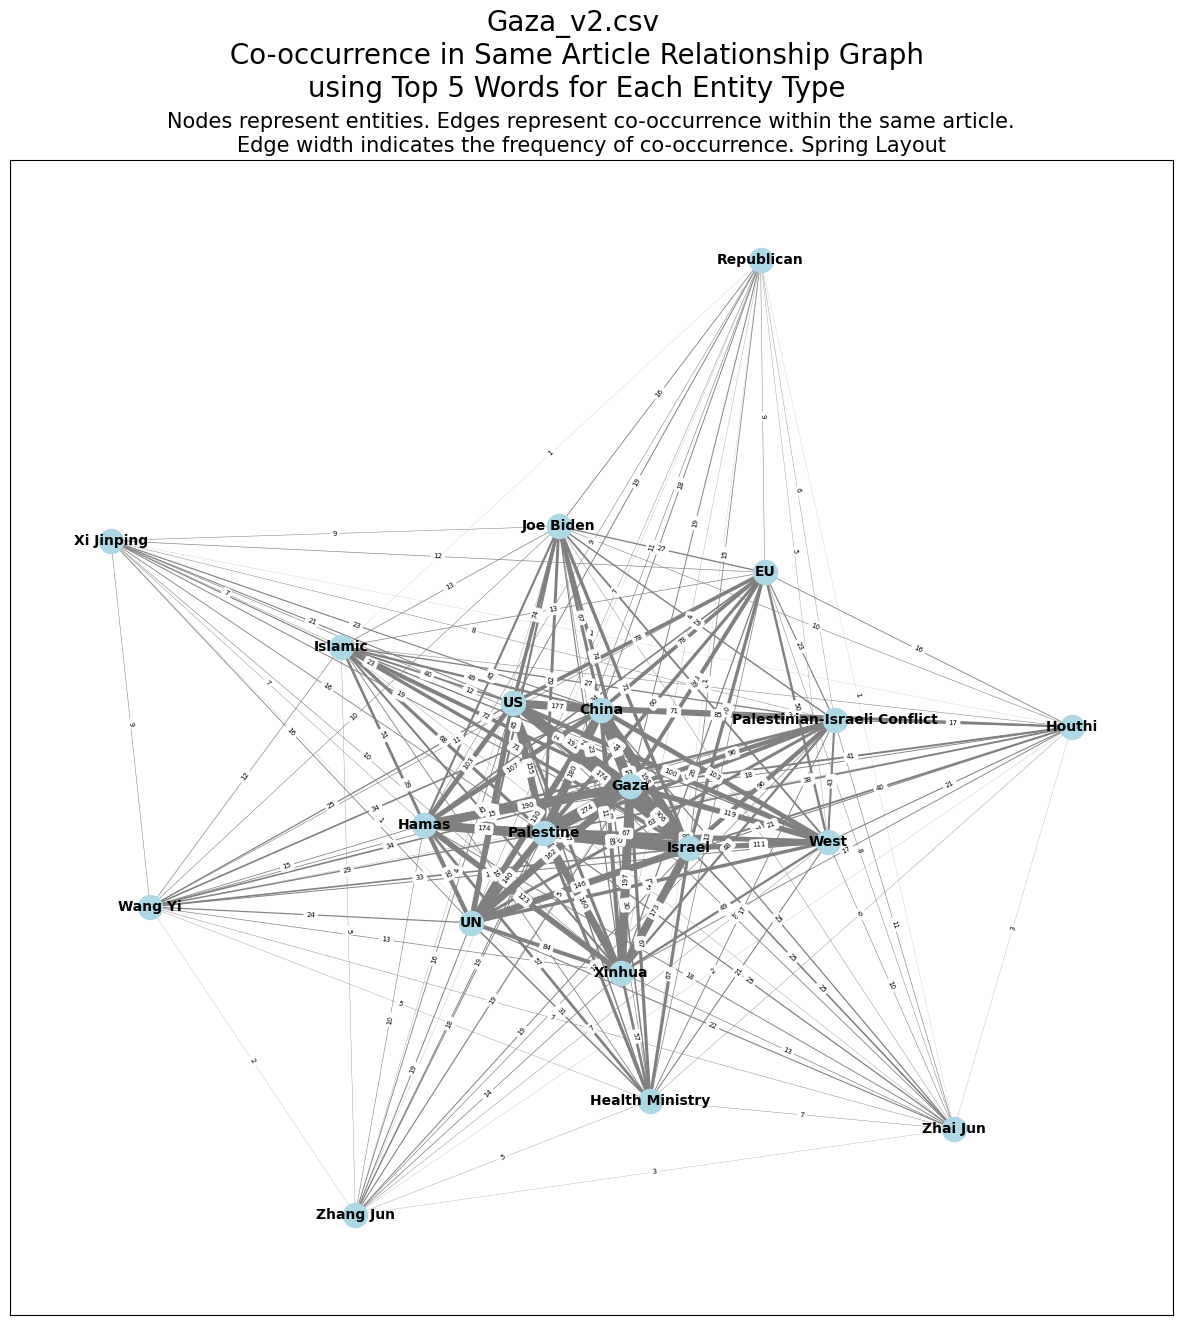

In [ ]:
#draw the graph
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G)
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]

max_weight = max(weights)
min_width = 0.07
normalized_weights = [(weight / max_weight * 10) + min_width for weight in weights]

nx.draw_networkx_nodes(G, pos, node_size=300, node_color='lightblue')
nx.draw_networkx_edges(G, pos, edgelist=edges, width=normalized_weights, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
#nx.draw(G, pos, with_labels=True, node_size=300, node_color='lightblue', edge_color='gray', font_size=10, font_weight='bold', width=weights)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=6)

plt.suptitle("Gaza_v2.csv\n Co-occurrence in Same Article Relationship Graph\n using Top 5 Words for Each Entity Type", fontsize=20)
plt.title("Nodes represent entities. Edges represent co-occurrence within the same article.\nEdge width indicates the frequency of co-occurrence. Spring Layout", fontsize=15)
plt.show()

---
## Relationship with co-occurence based in same sentence using hypergraph

In [ ]:
pip install hypernetx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 579.3/579.3 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 58.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 72.3 MB/s eta 0:00:00
  Attempting uninstall: decorator
    Found existing installation: decorator 4.4.2
    Uninstalling decorator-4.4.2:
      Successfully uninstalled decorator-4.4.2
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.

In [ ]:
import hypernetx as hnx
import matplotlib.pyplot as plt

In [ ]:
entities = list(set(entity.lower() for entity in entities_of_interest))
entities

['us',
 'health ministry',
 'china',
 'eu',
 'xinhua',
 'zhang jun',
 'houthi',
 'israel',
 'wang yi',
 'palestinian-israeli conflict',
 'republican',
 'joe biden',
 'gaza',
 'hamas',
 'un',
 'zhai jun',
 'xi jinping',
 'west',
 'palestine',
 'islamic']

In [ ]:
#function to find co-occurrences within sentences
def find_cooccurrences(text, entities):
    doc = nlp(text)
    co_occurrences = []

    for sent in doc.sents:
        sent_entities = [entity for entity in entities if entity in sent.text.lower()]
        if len(sent_entities) > 1:
            co_occurrences.append(tuple(sent_entities))

    return co_occurrences

In [ ]:
hyperedges = []

for article in preprocessed_data['article_text']:
    co_occurrences = find_cooccurrences(article, entities)
    hyperedges.extend(co_occurrences)

In [ ]:
hyperedges

[('us', 'israel', 'gaza', 'un'),
 ('health ministry', 'israel', 'gaza', 'hamas', 'un', 'palestine'),
 ('xinhua', 'israel', 'gaza'),
 ('health ministry', 'israel', 'gaza', 'hamas', 'un', 'palestine'),
 ('us', 'xinhua', 'israel', 'gaza'),
 ('health ministry', 'israel', 'gaza', 'hamas', 'un', 'palestine'),
 ('us', 'xinhua', 'israel', 'gaza'),
 ('health ministry', 'xinhua', 'israel', 'gaza', 'hamas', 'un', 'palestine'),
 ('health ministry', 'israel', 'gaza', 'hamas', 'un', 'palestine'),
 ('us', 'israel', 'gaza', 'palestine'),
 ('israel', 'un'),
 ('israel', 'hamas', 'un'),
 ('china', 'wang yi'),
 ('china', 'un'),
 ('china', 'wang yi'),
 ('us', 'china', 'eu'),
 ('china', 'un'),
 ('us', 'china'),
 ('us', 'gaza', 'un'),
 ('us', 'israel', 'palestine'),
 ('china', 'eu', 'un'),
 ('china', 'wang yi'),
 ('wang yi', 'un'),
 ('china', 'eu', 'un'),
 ('us', 'china', 'eu', 'un'),
 ('us', 'china', 'eu'),
 ('china', 'un'),
 ('us', 'china'),
 ('us', 'eu', 'un'),
 ('china', 'eu', 'un'),
 ('china', 'eu', 'un

In [ ]:
#remove duplicate hyperedges
#hyperedges = list(map(list, set(map(tuple, hyperedges))))
#hyperedges

In [ ]:
#count the frequency of each hyperedge
hyperedge_counter = Counter(map(tuple, hyperedges))
hyperedge_counter

Counter({('us', 'israel', 'gaza', 'un'): 54,
         ('health ministry', 'israel', 'gaza', 'hamas', 'un', 'palestine'): 44,
         ('xinhua', 'israel', 'gaza'): 40,
         ('us', 'xinhua', 'israel', 'gaza'): 8,
         ('health ministry',
          'xinhua',
          'israel',
          'gaza',
          'hamas',
          'un',
          'palestine'): 17,
         ('us', 'israel', 'gaza', 'palestine'): 15,
         ('israel', 'un'): 111,
         ('israel', 'hamas', 'un'): 35,
         ('china', 'wang yi'): 12,
         ('china', 'un'): 170,
         ('us', 'china', 'eu'): 19,
         ('us', 'china'): 271,
         ('us', 'gaza', 'un'): 76,
         ('us', 'israel', 'palestine'): 74,
         ('china', 'eu', 'un'): 16,
         ('wang yi', 'un'): 2,
         ('us', 'china', 'eu', 'un'): 24,
         ('us', 'eu', 'un'): 39,
         ('us', 'gaza'): 59,
         ('us',
          'china',
          'eu',
          'israel',
          'palestinian-israeli conflict',
          'un'

In [ ]:
filtered_hyperedges = [list(edge) for edge, count in hyperedge_counter.items() if count > 10]
filtered_hyperedges

[['us', 'israel', 'gaza', 'un'],
 ['health ministry', 'israel', 'gaza', 'hamas', 'un', 'palestine'],
 ['xinhua', 'israel', 'gaza'],
 ['health ministry', 'xinhua', 'israel', 'gaza', 'hamas', 'un', 'palestine'],
 ['us', 'israel', 'gaza', 'palestine'],
 ['israel', 'un'],
 ['israel', 'hamas', 'un'],
 ['china', 'wang yi'],
 ['china', 'un'],
 ['us', 'china', 'eu'],
 ['us', 'china'],
 ['us', 'gaza', 'un'],
 ['us', 'israel', 'palestine'],
 ['china', 'eu', 'un'],
 ['us', 'china', 'eu', 'un'],
 ['us', 'eu', 'un'],
 ['us', 'gaza'],
 ['us', 'un', 'islamic'],
 ['us', 'un'],
 ['us', 'israel', 'un', 'palestine'],
 ['us', 'un', 'west'],
 ['israel', 'palestine'],
 ['us', 'west'],
 ['eu', 'un'],
 ['china', 'eu'],
 ['xinhua', 'israel'],
 ['us', 'israel'],
 ['us', 'israel', 'hamas'],
 ['joe biden', 'un'],
 ['us', 'china', 'un'],
 ['israel', 'palestinian-israeli conflict', 'gaza', 'un'],
 ['us', 'china', 'israel', 'palestine'],
 ['us', 'eu'],
 ['gaza', 'un'],
 ['un', 'palestine'],
 ['health ministry', 'isr

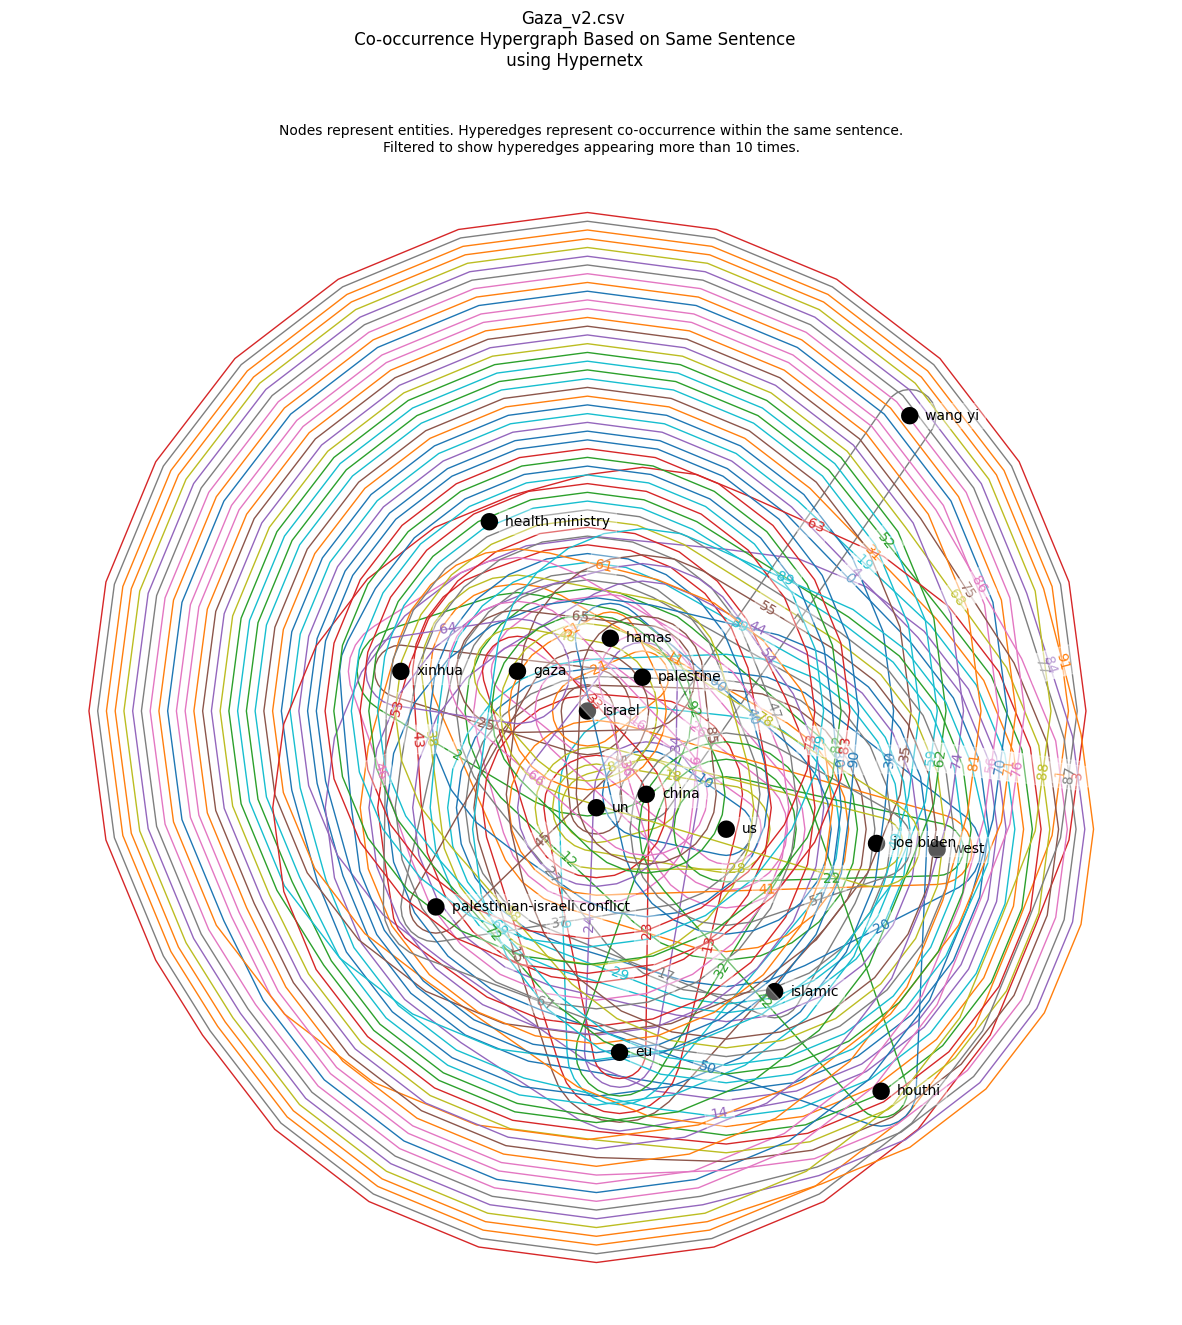

In [ ]:
H = hnx.Hypergraph(filtered_hyperedges)

plt.figure(figsize=(15, 15))
hnx.draw(H, with_node_labels=True, with_edge_labels=True)
plt.suptitle("Gaza_v2.csv\n Co-occurrence Hypergraph Based on Same Sentence\n using Hypernetx")
plt.title("Nodes represent entities. Hyperedges represent co-occurrence within the same sentence.\nFiltered to show hyperedges appearing more than 10 times.", fontsize=10)
plt.show()

---
## Relationship with co-occurence based in same article using hypergraph

In [ ]:
def find_cooccurrences(text, entities):
    doc = nlp(text)
    doc_text = doc.text.lower()
    co_occurrences = []

    article_entities = [entity for entity in entities if entity in doc_text]
    if len(article_entities) > 1:
        co_occurrences.append(tuple(article_entities))

    return co_occurrences

In [ ]:
hyperedges = []

for article in preprocessed_data['article_text']:
    co_occurrences = find_cooccurrences(article, entities)
    hyperedges.extend(co_occurrences)

In [ ]:
hyperedges

[('us',
  'health ministry',
  'xinhua',
  'israel',
  'gaza',
  'hamas',
  'un',
  'palestine'),
 ('us', 'china', 'eu', 'israel', 'wang yi', 'gaza', 'un', 'palestine'),
 ('us',
  'china',
  'eu',
  'israel',
  'wang yi',
  'palestinian-israeli conflict',
  'gaza',
  'un'),
 ('us', 'china', 'eu', 'israel', 'gaza', 'un', 'west', 'palestine', 'islamic'),
 ('us', 'china', 'eu', 'gaza', 'un', 'west'),
 ('us', 'xinhua', 'israel', 'gaza', 'hamas', 'un'),
 ('xinhua', 'gaza'),
 ('us',
  'china',
  'houthi',
  'israel',
  'palestinian-israeli conflict',
  'joe biden',
  'gaza',
  'un',
  'palestine',
  'islamic'),
 ('us', 'israel', 'palestinian-israeli conflict', 'gaza', 'un'),
 ('us', 'china', 'eu', 'xinhua', 'israel', 'gaza', 'un', 'west', 'palestine'),
 ('us',
  'health ministry',
  'china',
  'israel',
  'joe biden',
  'gaza',
  'un',
  'palestine',
  'islamic'),
 ('us',
  'china',
  'xinhua',
  'houthi',
  'israel',
  'palestinian-israeli conflict',
  'gaza',
  'un',
  'west',
  'palestine

In [ ]:
hyperedge_counter = Counter(map(tuple, hyperedges))
hyperedge_counter

Counter({('us',
          'health ministry',
          'xinhua',
          'israel',
          'gaza',
          'hamas',
          'un',
          'palestine'): 7,
         ('us',
          'china',
          'eu',
          'israel',
          'wang yi',
          'gaza',
          'un',
          'palestine'): 1,
         ('us',
          'china',
          'eu',
          'israel',
          'wang yi',
          'palestinian-israeli conflict',
          'gaza',
          'un'): 1,
         ('us',
          'china',
          'eu',
          'israel',
          'gaza',
          'un',
          'west',
          'palestine',
          'islamic'): 1,
         ('us', 'china', 'eu', 'gaza', 'un', 'west'): 5,
         ('us', 'xinhua', 'israel', 'gaza', 'hamas', 'un'): 1,
         ('xinhua', 'gaza'): 5,
         ('us',
          'china',
          'houthi',
          'israel',
          'palestinian-israeli conflict',
          'joe biden',
          'gaza',
          'un',
          'pa

In [ ]:
filtered_hyperedges = [list(edge) for edge, count in hyperedge_counter.items() if count > 1]
filtered_hyperedges

[['us',
  'health ministry',
  'xinhua',
  'israel',
  'gaza',
  'hamas',
  'un',
  'palestine'],
 ['us', 'china', 'eu', 'gaza', 'un', 'west'],
 ['xinhua', 'gaza'],
 ['us', 'israel', 'palestinian-israeli conflict', 'gaza', 'un'],
 ['us', 'china', 'eu', 'xinhua', 'israel', 'gaza', 'un', 'west', 'palestine'],
 ['us', 'china', 'eu', 'republican', 'joe biden', 'gaza', 'un'],
 ['us', 'china', 'houthi', 'israel', 'gaza', 'un', 'palestine'],
 ['xinhua', 'gaza', 'un'],
 ['us', 'israel', 'gaza', 'un'],
 ['health ministry', 'xinhua', 'israel', 'gaza', 'hamas', 'un', 'palestine'],
 ['xinhua', 'israel', 'gaza'],
 ['us', 'china', 'israel', 'gaza', 'un'],
 ['health ministry', 'xinhua', 'israel', 'gaza', 'un', 'palestine'],
 ['us',
  'china',
  'xinhua',
  'houthi',
  'israel',
  'palestinian-israeli conflict',
  'joe biden',
  'gaza',
  'un',
  'west',
  'palestine'],
 ['us',
  'health ministry',
  'xinhua',
  'israel',
  'gaza',
  'hamas',
  'un',
  'west',
  'palestine'],
 ['xinhua', 'israel', 'ga

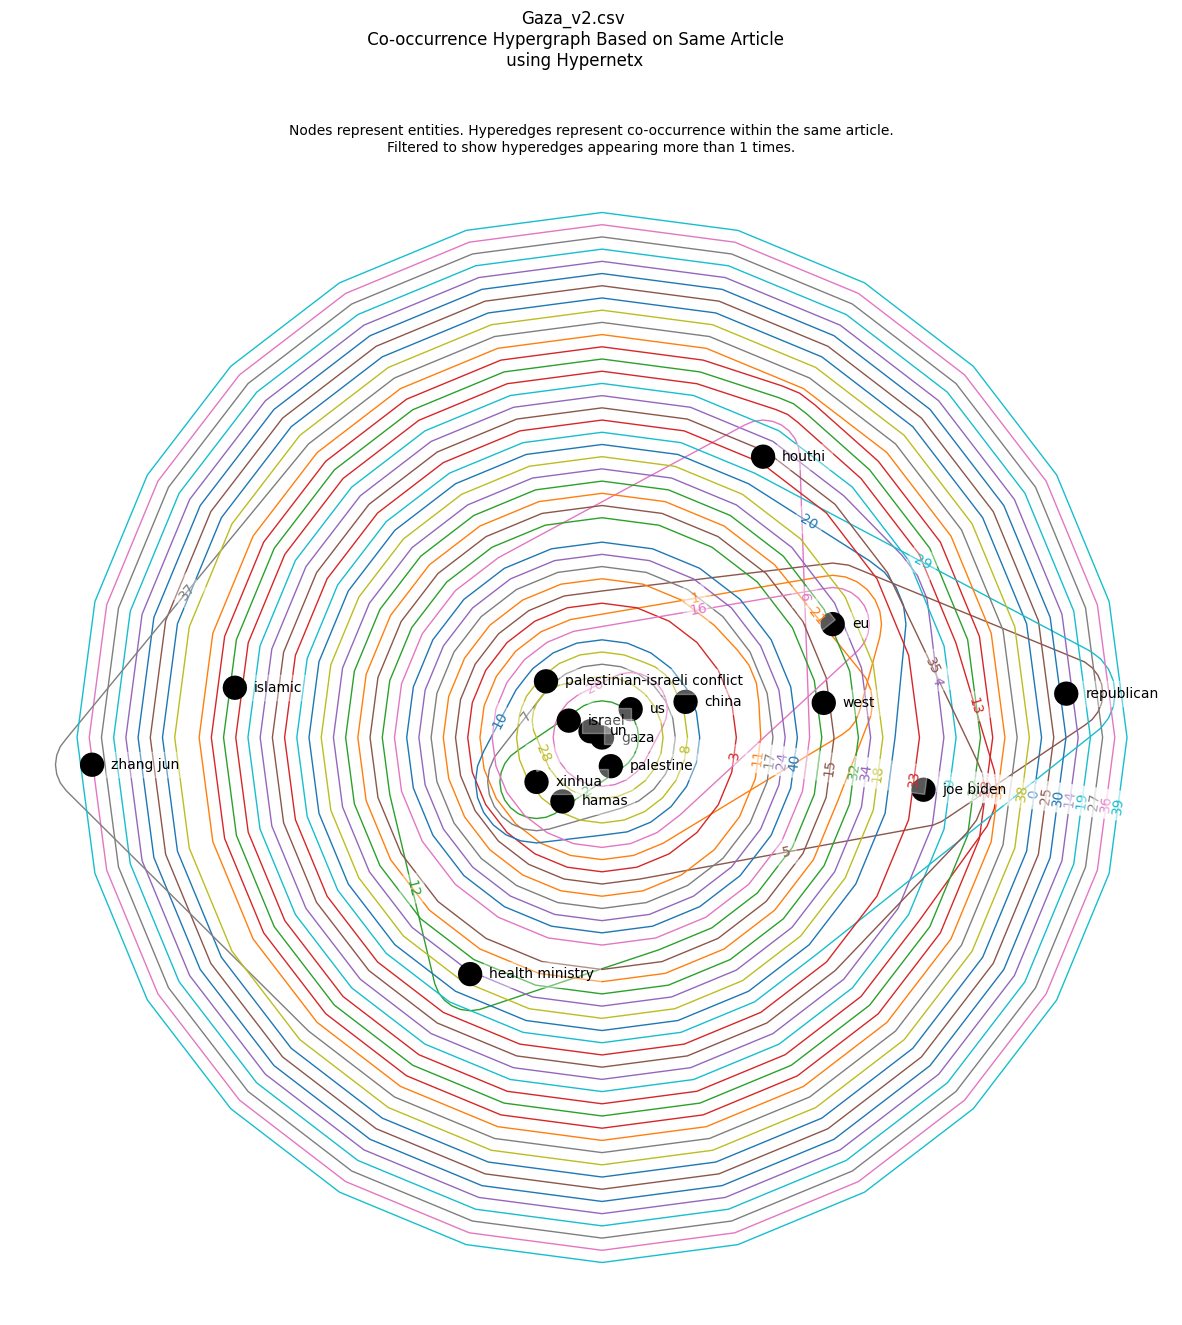

In [ ]:
H = hnx.Hypergraph(filtered_hyperedges)

plt.figure(figsize=(15, 15))
hnx.draw(H, with_node_labels=True, with_edge_labels=True)
plt.suptitle("Gaza_v2.csv\n Co-occurrence Hypergraph Based on Same Article\n using Hypernetx")
plt.title("Nodes represent entities. Hyperedges represent co-occurrence within the same article.\nFiltered to show hyperedges appearing more than 1 times.", fontsize=10)
plt.show()